# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [133]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
import scipy.stats as st
from datetime import datetime

api_keys = '53fe84b3facffea7703ad2d29b86e214'

# Impor the OpenWeatherMap API key
# from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [92]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [100]:
# Set the API base URL
# url =f"https://api.openweathermap.org/data/3.0/onecall?lat=33.44&lon=-94.04&appid={api_keys}"

url = "http://api.openweathermap.org/data/2.5/weather?"

# # Define an empty list to fetch the weather data for each city
city_data = []

# # Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# # Create counters
record_count = 1
set_count = 1

# # Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
#     # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

#     # # Create endpoint URL with each city
    # city_url = url + "appid=" + api_keys + "&q=" + city + "&units=metric"
    # city_url = f"{url}appid={api_keys}&q={city}&units=metric"
# city_url =f"{url}&units=metric&appid={api_keys}"
    city_url = f"{url}q={city}&units=metric&appid={api_keys}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#     # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()


     # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # time.sleep(10)          

# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | acarau
Processing Record 3 of Set 1 | port mathurin
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | saipan
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | teknaf
Processing Record 8 of Set 1 | nova xavantina
Processing Record 9 of Set 1 | hadibu
Processing Record 10 of Set 1 | warmbad
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | nantucket
Processing Record 13 of Set 1 | tadmur
Processing Record 14 of Set 1 | changling
Processing Record 15 of Set 1 | buala
Processing Record 16 of Set 1 | susuman
Processing Record 17 of Set 1 | minas de marcona
Processing Record 18 of Set 1 | san julian
Processing Record 19 of Set 1 | remire-montjoly
Processing Record 20 of Set 1 | zhanibek
Processing Record 21 of Set 1 | gardnerville ranchos
Processing Record 22 of Set 1 | eraan
Processing Record

In [101]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [105]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,23.06,81,97,4.37,PN,1717822049
1,acarau,-2.8856,-40.1200,24.82,89,65,4.23,BR,1717821936
2,port mathurin,-19.6833,63.4167,23.78,77,27,9.24,MU,1717822049
3,punta arenas,-53.1500,-70.9167,2.06,87,20,2.06,CL,1717822049
4,saipan,15.1355,145.7010,32.39,62,40,7.20,MP,1717822049


In [107]:
# Create the output directory if it doesn't exist
output_directory = 'output_data'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

In [108]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [109]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,23.06,81,97,4.37,PN,1717822049
1,acarau,-2.8856,-40.1200,24.82,89,65,4.23,BR,1717821936
2,port mathurin,-19.6833,63.4167,23.78,77,27,9.24,MU,1717822049
3,punta arenas,-53.1500,-70.9167,2.06,87,20,2.06,CL,1717822049
4,saipan,15.1355,145.7010,32.39,62,40,7.20,MP,1717822049


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

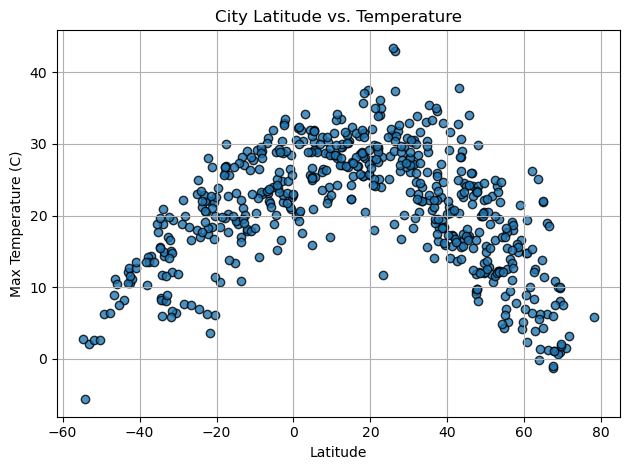

In [116]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

#Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

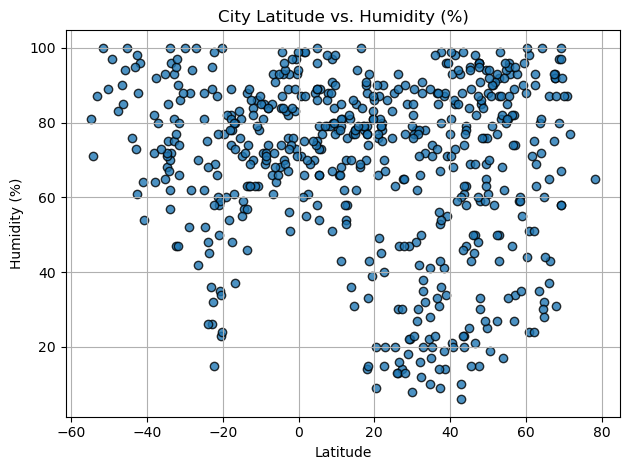

In [118]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

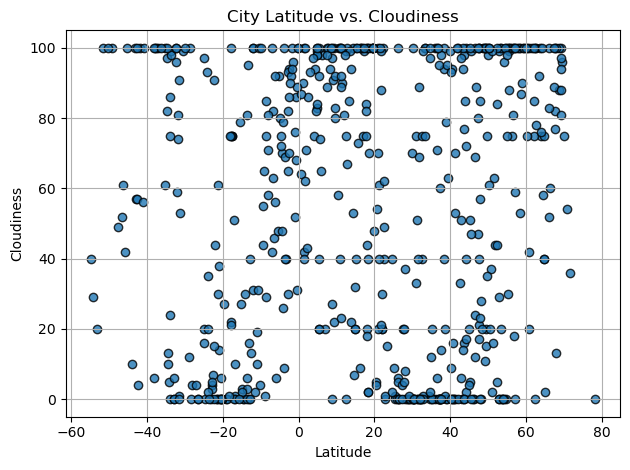

In [120]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

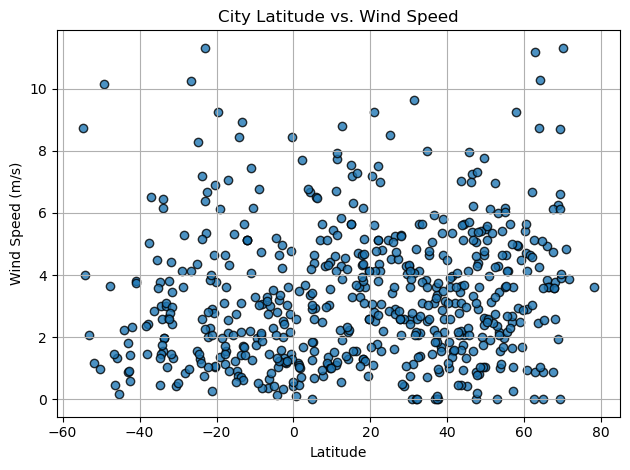

In [122]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()



---

## Requirement 2: Compute Linear Regression for Each Relationship


In [134]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [135]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,saipan,15.1355,145.7010,32.39,62,40,7.20,MP,1717822049
6,teknaf,20.8624,92.3058,29.91,76,70,2.82,BD,1717822050
8,hadibu,12.6500,54.0333,29.58,76,67,8.79,YE,1717822050
11,nantucket,41.2835,-70.0995,17.22,98,70,3.98,US,1717822050
12,tadmur,34.5608,38.2805,33.11,22,1,3.84,SY,1717821765


In [130]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,23.06,81,97,4.37,PN,1717822049
1,acarau,-2.8856,-40.1200,24.82,89,65,4.23,BR,1717821936
2,port mathurin,-19.6833,63.4167,23.78,77,27,9.24,MU,1717822049
3,punta arenas,-53.1500,-70.9167,2.06,87,20,2.06,CL,1717822049
5,grytviken,-54.2811,-36.5092,-5.62,71,29,4.00,GS,1717822050


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7245478108988777


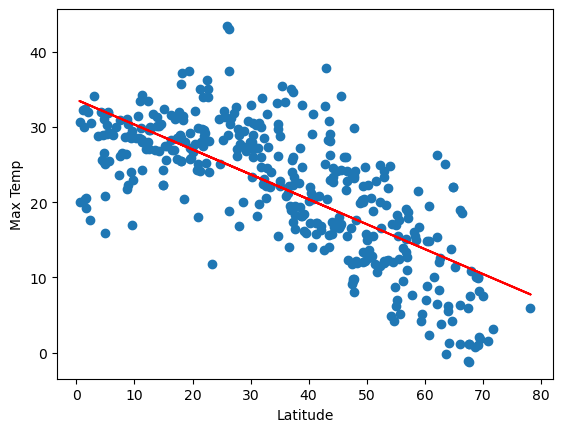

In [136]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

The r-value is: 0.7544249297712187


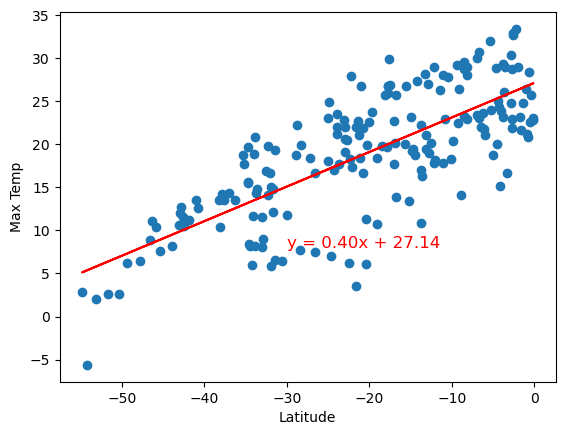

In [137]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))


**Discussion about the linear relationship:** 
Observations about linear relationship:
The regression displays a pretty strong negative correlation between temperature and latitude
in the northern hemisphere, as the latitude increases so does the distance from the equator increases
When you move further away from the equator, the temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.033486685082323525


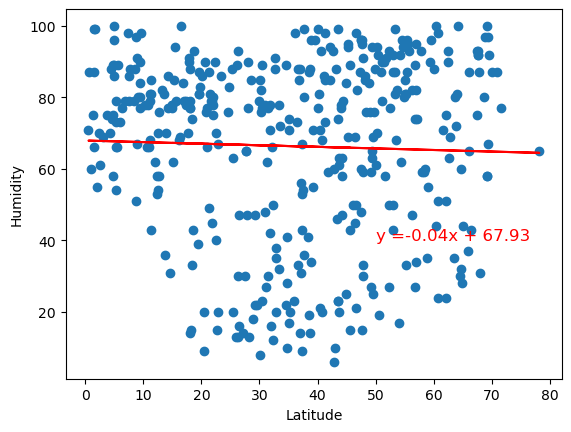

In [138]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))


The r-value is: -0.030363610252305537


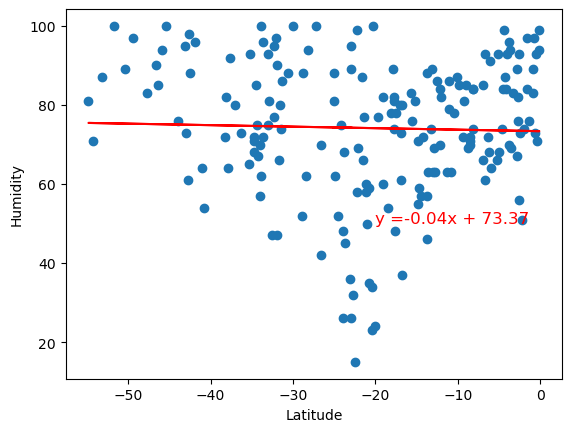

In [140]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))


**Discussion about the linear relationship:** 
The relationship is slightly positive on the Northern Hemisphere
Humidity increases as cities get closer to the equator

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.001939955655204488


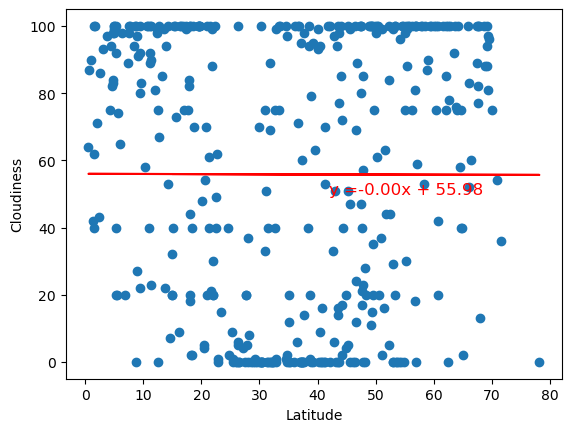

In [141]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))


The r-value is: 0.012674507993808124


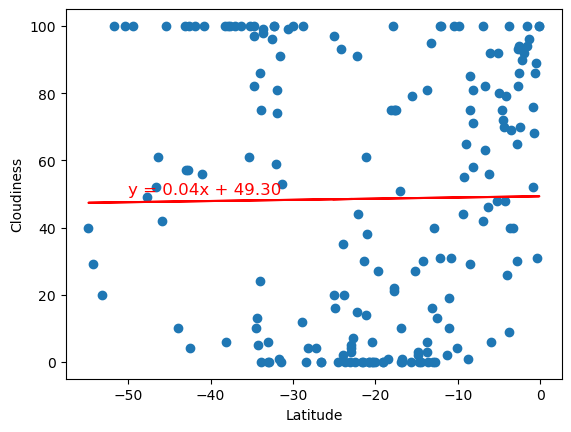

In [142]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))


**Discussion about the linear relationship:** 
There is no correlation between latitude and cloudiness.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


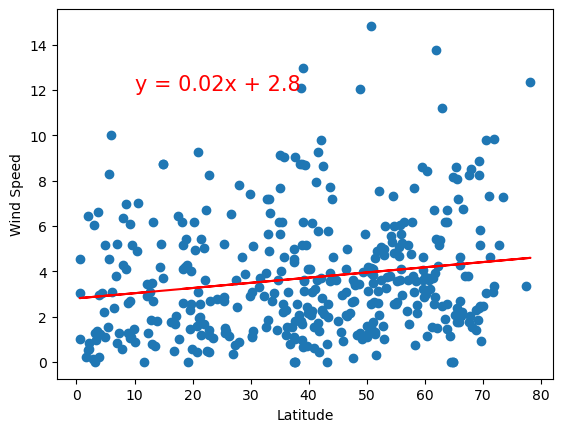

In [ ]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))


The r-value is: -0.05722458329874544


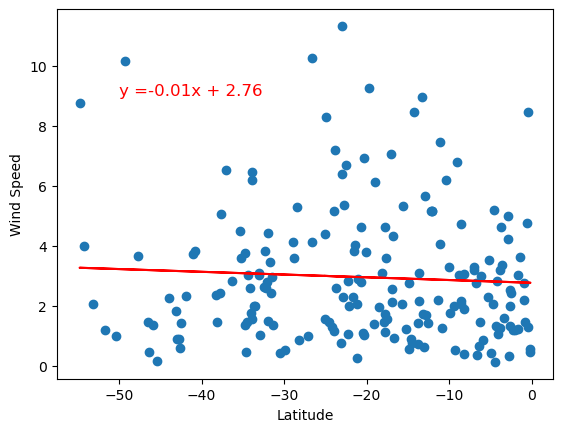

In [145]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))


**Discussion about the linear relationship:** 
There is no correlation between latitude and wind speed.
